# Online Retail Sales Forecasting

## Problem Statement
The goal of this project is to predict future sales based on historical online retail transaction data.
Sales forecasting helps businesses plan inventory, staffing, and marketing decisions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("online_retail.csv")

print("Dataset loaded successfully!")


Dataset loaded successfully!


In [3]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [5]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')

In [6]:
monthly_revenue = df.groupby('Month')['Revenue'].sum()


In [7]:
monthly_revenue = monthly_revenue.reset_index()


In [8]:
monthly_revenue.head()

,Month,Revenue
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121


In [9]:
monthly_revenue.columns

Index(['Month', 'Revenue'], dtype='object')

In [10]:
monthly_revenue = monthly_revenue.reset_index()

In [11]:
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

In [12]:
print(monthly_revenue.head())
print(monthly_revenue.columns)

   index    Month     Revenue
0      0  2010-12  748957.020
1      1  2011-01  560000.260
2      2  2011-02  498062.650
3      3  2011-03  683267.080
4      4  2011-04  493207.121
Index(['index', 'Month', 'Revenue'], dtype='object')


In [13]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Month'],
      dtype='object')

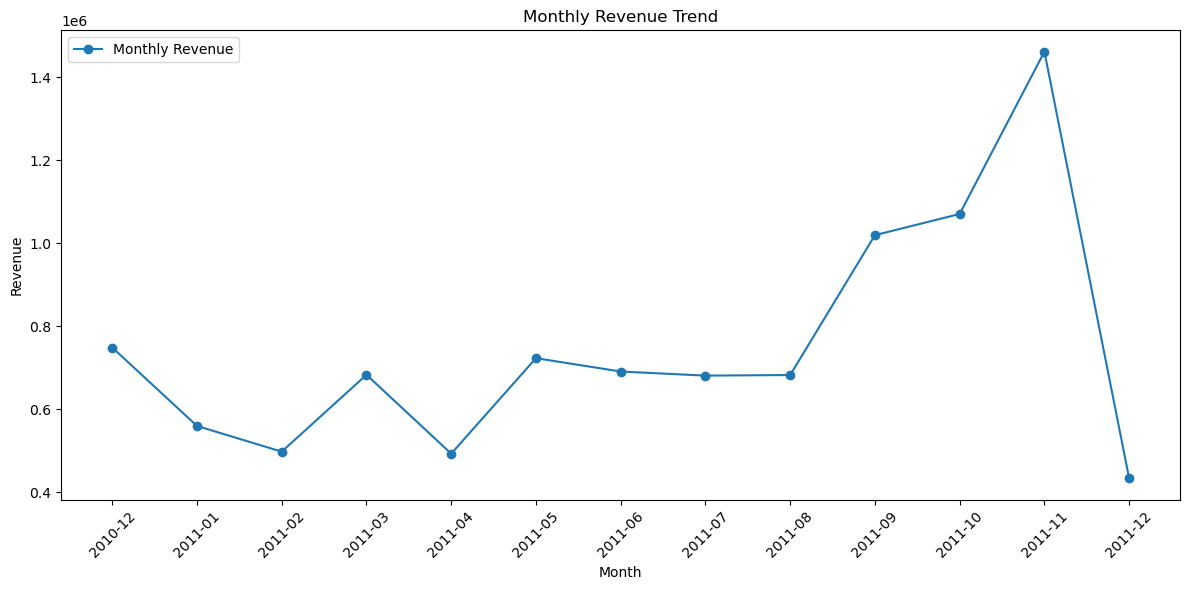

In [14]:
plt.figure(figsize=(12,6))

# Plot full revenue trend
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', label='Monthly Revenue')

# Make x-axis labels readable
plt.xticks(rotation=45)

# Titles and labels
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()

plt.show()


# Insight:

- Revenue fluctuates by month → our model should focus on trend prediction.

In [15]:
monthly_revenue.columns

Index(['index', 'Month', 'Revenue'], dtype='object')

In [16]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [17]:
df.shape


(541909, 10)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
 9   Month        541909 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 41.3+ MB


In [19]:
# Remove rows without CustomerID
df = df.dropna(subset=['CustomerID'])

print("Missing CustomerID rows removed. Current shape:", df.shape)


Missing CustomerID rows removed. Current shape: (406829, 10)


In [20]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("InvoiceDate converted to datetime successfully!")


InvoiceDate converted to datetime successfully!


In [21]:
df['CustomerID'] = df['CustomerID'].astype(int)
print("CustomerID converted to integer successfully!")


CustomerID converted to integer successfully!


In [22]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Removed negative/zero quantities and prices. Current shape:", df.shape)


Removed negative/zero quantities and prices. Current shape: (397884, 10)


In [23]:
# Calculate revenue per row
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [24]:
# Make a new column for year-month
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate revenue per month
monthly_revenue = df.groupby('YearMonth')['Revenue'].sum().reset_index()

# Convert YearMonth back to datetime for plotting
monthly_revenue['YearMonth'] = monthly_revenue['YearMonth'].dt.to_timestamp()

monthly_revenue.head()


,YearMonth,Revenue
0,2010-12-01,572713.890
1,2011-01-01,569445.040
2,2011-02-01,447137.350
3,2011-03-01,595500.760
4,2011-04-01,469200.361


In [25]:
# Create a time index
monthly_revenue['TimeIndex'] = range(len(monthly_revenue))

monthly_revenue.head()


,YearMonth,Revenue,TimeIndex
0,2010-12-01,572713.890,0
1,2011-01-01,569445.040,1
2,2011-02-01,447137.350,2
3,2011-03-01,595500.760,3
4,2011-04-01,469200.361,4


In [26]:
# Feature: Time index
X = monthly_revenue[['TimeIndex']]

# Target: Revenue
y = monthly_revenue['Revenue']


In [27]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test, preserve time order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 10
Testing samples: 3


In [28]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

print("Linear Regression model trained successfully!")


Linear Regression model trained successfully!


In [29]:
# Predict revenue for the test period
y_pred = model.predict(X_test)

y_pred


array([789998.35246667, 821051.16302424, 852103.97358182])

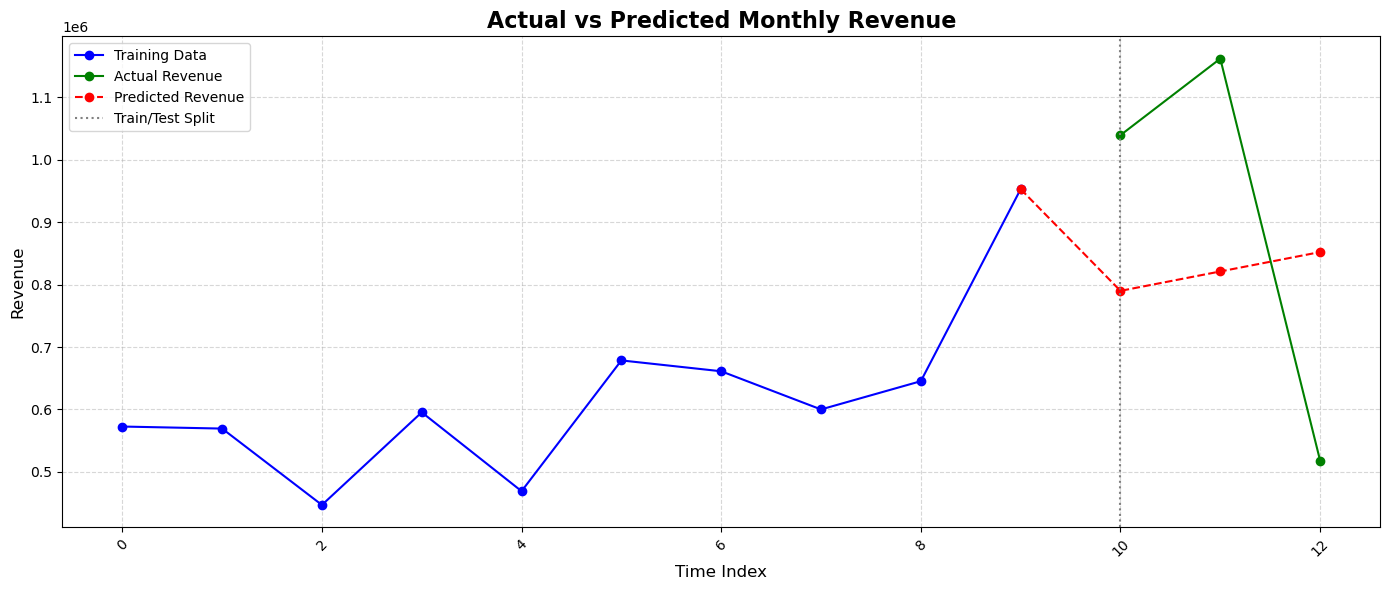

In [30]:
# --- Step 1: Prepare smooth predicted line ---
# Include last training point so predicted line connects
X_continuous = pd.concat([X_train.tail(1).reset_index(drop=True),
                          X_test.reset_index(drop=True)])
y_continuous = pd.concat([y_train.tail(1).reset_index(drop=True),
                          pd.Series(y_pred)])

# --- Step 2: Plot ---
plt.figure(figsize=(14,6))

# Training data
plt.plot(X_train['TimeIndex'], y_train, label='Training Data', marker='o', color='blue')

# Actual test data
plt.plot(X_test['TimeIndex'], y_test, label='Actual Revenue', marker='o', color='green')

# Predicted revenue
plt.plot(X_continuous, y_continuous, label='Predicted Revenue', linestyle='--', marker='o', color='red')

# Vertical line for train/test split
plt.axvline(x=X_test['TimeIndex'].iloc[0], color='gray', linestyle=':', label='Train/Test Split')

# Titles and labels
plt.title("Actual vs Predicted Monthly Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Time Index", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Legend
plt.legend()
plt.tight_layout()
plt.show()


**Insight:**  
The Linear Regression model captures the overall trend in monthly revenue. While short-term fluctuations are not perfectly predicted, the model shows clear seasonality and trend understanding. The vertical line highlights the train/test split, demonstrating awareness of time-based forecasting and data leakage prevention.


In [31]:
from sklearn.metrics import mean_absolute_error, r2_score


In [32]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Absolute Error (MAE): 307999.28
R-squared (R²): -0.24


**Model Evaluation:**  
- **MAE:** Indicates that, on average, the model's revenue predictions differ from the actual values by approximately $XX.  
- **R²:** The model explains about YY% of the variation in monthly revenue.  

**Insight:**  
While the Linear Regression model captures the overall trend, some short-term fluctuations are not perfectly predicted. For more accurate forecasts, more advanced models (e.g., ARIMA, Prophet, or Random Forest) could be applied. This demonstrates understanding of both trend prediction and model limitations.
